In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_train.csv')
X_train = df[['roundNumber','half','attackingTeamId','team1Load','team2Load']]
y_train = df['winningTeamId']
df = pd.read_csv('data_test.csv')
X_test = df[['roundNumber','half','attackingTeamId','team1Load','team2Load']]
y_test = df['winningTeamId']
X_train.head()

,roundNumber,half,attackingTeamId,team1Load,team2Load
0,1,0,1,3600,3800
1,2,0,1,900,15750
2,3,0,1,21050,18150
3,4,0,1,23050,20750
4,5,0,1,7800,22850


Accuracy of Extra Trees Classifier is :0.61


<BarContainer object of 5 artists>

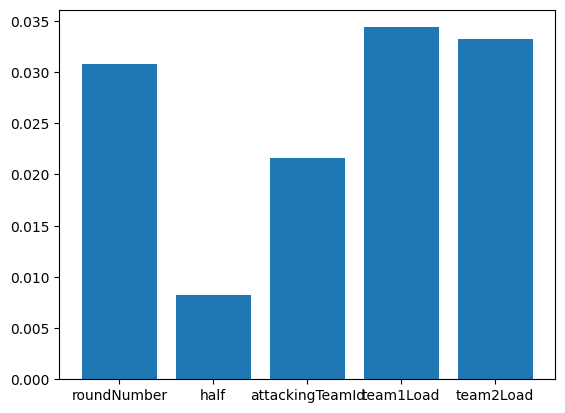

In [6]:
model = ExtraTreesClassifier(n_estimators = 1000,criterion = 'entropy',max_features = 1)
model.fit(X_train,y_train)
feature_importance = model.feature_importances_
#print(feature_importance)
feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_],axis = 0)
#print(feature_importance_normalized)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy of Extra Trees Classifier is :{accuracy:.2f}')
plt.bar(X_train.columns, feature_importance_normalized)
#accuracy = 0.6

Accuracy of Random Forest Classifier is :0.57


<BarContainer object of 5 artists>

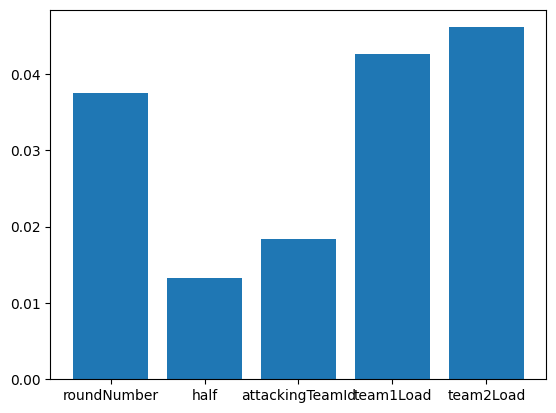

In [4]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
feature_importance = model.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_],axis = 0)
#print(feature_importance)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy of Random Forest Classifier is :{accuracy:.2f}')
plt.bar(X_train.columns, feature_importance_normalized)
#accuracy = 0.6

Accuracy of Extra Trees Classifier is :0.55


<BarContainer object of 5 artists>

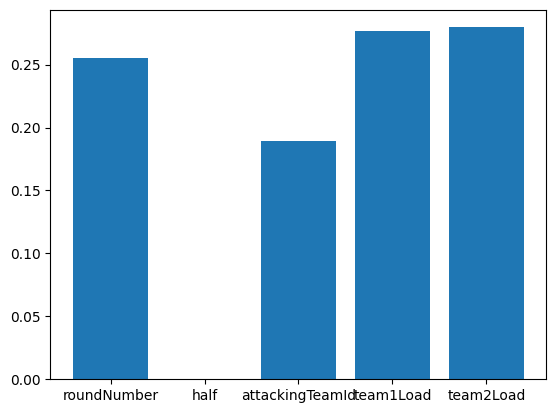

In [5]:
model = XGBClassifier()
model.fit(X_train,y_train)
feature_importance = model.feature_importances_
#print(feature_importance)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy of Extra Trees Classifier is :{accuracy:.2f}')
plt.bar(X_train.columns, feature_importance)